In [24]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import cv2
from keras.models import load_model
import numpy as np

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

network.save('my_model.h5')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8710 - loss: 0.4425
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9664 - loss: 0.1148
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9787 - loss: 0.0721
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9857 - loss: 0.0479
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0371


In [72]:
model = load_model('my_model.h5')

img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)

img = 255 - img

_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

img = cv2.resize(img, (20, 20))
img_padded = np.pad(img, ((4, 4), (4, 4)), 'constant', constant_values=0)

img_ready = img_padded.reshape(1, 28 * 28).astype('float32') / 255

prediction = model.predict(img_ready)
digit = np.argmax(prediction)

print("Розпізнана цифра:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Розпізнана цифра: 3


In [60]:
#Task2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [61]:
#CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

model_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cifar.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_cifar.fit(x_train_cifar, y_train_cifar, epochs=10, validation_data=(x_test_cifar, y_test_cifar))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3079 - loss: 1.8642 - val_accuracy: 0.5386 - val_loss: 1.2865
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5015 - loss: 1.3918 - val_accuracy: 0.6046 - val_loss: 1.1399
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5516 - loss: 1.2548 - val_accuracy: 0.6280 - val_loss: 1.0728
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5895 - loss: 1.1614 - val_accuracy: 0.6516 - val_loss: 1.0109
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6152 - loss: 1.0990 - val_accuracy: 0.6427 - val_loss: 1.0268
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6334 - loss: 1.0380 - val_accuracy: 0.6650 - val_loss: 0.9633
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6511 - loss: 0.9900 - val_accuracy: 0.6707 - val_loss: 0.9519
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6676 - loss: 0

In [62]:
#Fashion-MNIST
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

x_train_fmnist = x_train_fmnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_fmnist = x_test_fmnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_fmnist = to_categorical(y_train_fmnist, 10)
y_test_fmnist = to_categorical(y_test_fmnist, 10)

model_fmnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_fmnist.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_fmnist.fit(x_train_fmnist, y_train_fmnist, epochs=10, validation_data=(x_test_fmnist, y_test_fmnist))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7262 - loss: 0.7462 - val_accuracy: 0.8673 - val_loss: 0.3642
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8561 - loss: 0.3972 - val_accuracy: 0.8814 - val_loss: 0.3229
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8795 - loss: 0.3343 - val_accuracy: 0.8895 - val_loss: 0.3001
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8910 - loss: 0.2980 - val_accuracy: 0.8967 - val_loss: 0.2831
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9021 - loss: 0.2733 - val_accuracy: 0.9025 - val_loss: 0.2658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9073 - loss: 0.2536 - val_accuracy: 0.9057 - val_loss: 0.2560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9111 - loss: 0.2466 - val_accuracy: 0.9030 - val_loss: 0.2705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9193 - loss: 0

In [63]:
def show_predictions(model, x_data, y_true, labels, is_grayscale=False):
    predictions = model.predict(x_data[:5])
    plt.figure(figsize=(10, 4))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = x_data[i].reshape(28, 28) if is_grayscale else x_data[i]
        plt.imshow(img, cmap='gray' if is_grayscale else None)
        pred_label = labels[np.argmax(predictions[i])]
        true_label = labels[np.argmax(y_true[i])]
        plt.title(f"P: {pred_label}\nT: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [64]:
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
fmnist_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

CIFAR-10 Predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


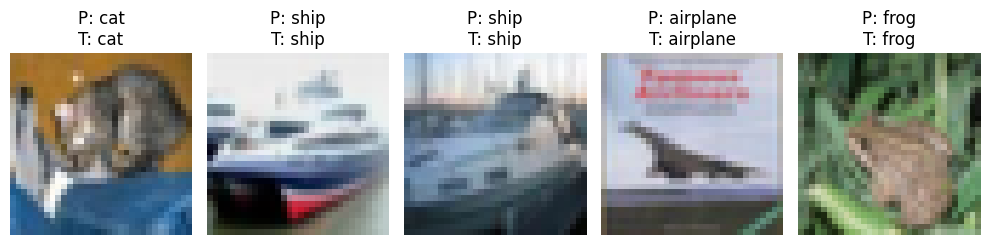

Fashion-MNIST Predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


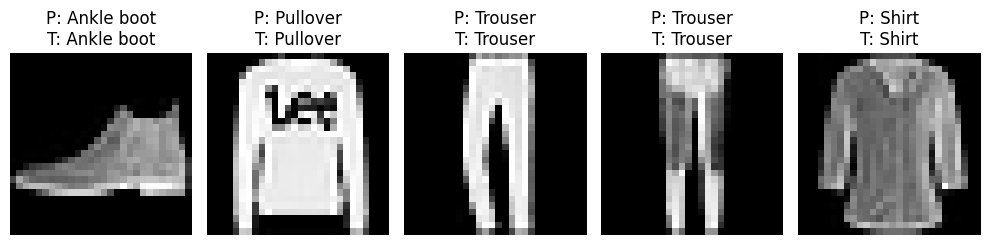

In [65]:
print("CIFAR-10 Predictions")
show_predictions(model_cifar, x_test_cifar, y_test_cifar, cifar_labels)

print("Fashion-MNIST Predictions")
show_predictions(model_fmnist, x_test_fmnist, y_test_fmnist, fmnist_labels, is_grayscale=True)